In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import data from file
insuranceData = pd.read_csv('Insurance.csv')
insuranceData

,Age,Average Claims per Year (Rupees)
0,25,4500
1,30,5000
2,35,6000
3,40,8000
4,45,11000
5,50,15000
6,55,20000
7,60,30000
8,65,50000
9,70,100000


In [4]:
# All mathematical operations will be performed on the matrix, so now we create
# matrix for dependent variables and independent variables.
X = insuranceData.iloc[:,0:1].values
y = insuranceData.iloc[:,1].values
print(X)
print(y)

[[25]
 [30]
 [35]
 [40]
 [45]
 [50]
 [55]
 [60]
 [65]
 [70]]
[  4500   5000   6000   8000  11000  15000  20000  30000  50000 100000]


In [5]:
#==============================================================================
# We will not distribute the dataset into test and train as we have very less 
# number of data and which is not equally distributed, so if we miss any of 
# the value, it may have severe implications on the model creation.
#==============================================================================


In [6]:
# Let us first fit data with linear regression to see the comparison later
from sklearn.linear_model import LinearRegression
linregressor = LinearRegression()
linregressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
#==============================================================================
# Now fit the polynomial regressor. First we will use degree 2 and later higher
# If one changes the degree from 2 to 3 or higher, a higher tendency to overfit
# is seen.
#==============================================================================

In [8]:
from sklearn.preprocessing import PolynomialFeatures

#First create a polynomial
polyfeature = PolynomialFeatures(degree = 3)
Poly_Matrix = polyfeature.fit_transform(X)
Poly_Matrix

array([[  1.00000000e+00,   2.50000000e+01,   6.25000000e+02,
          1.56250000e+04],
       [  1.00000000e+00,   3.00000000e+01,   9.00000000e+02,
          2.70000000e+04],
       [  1.00000000e+00,   3.50000000e+01,   1.22500000e+03,
          4.28750000e+04],
       [  1.00000000e+00,   4.00000000e+01,   1.60000000e+03,
          6.40000000e+04],
       [  1.00000000e+00,   4.50000000e+01,   2.02500000e+03,
          9.11250000e+04],
       [  1.00000000e+00,   5.00000000e+01,   2.50000000e+03,
          1.25000000e+05],
       [  1.00000000e+00,   5.50000000e+01,   3.02500000e+03,
          1.66375000e+05],
       [  1.00000000e+00,   6.00000000e+01,   3.60000000e+03,
          2.16000000e+05],
       [  1.00000000e+00,   6.50000000e+01,   4.22500000e+03,
          2.74625000e+05],
       [  1.00000000e+00,   7.00000000e+01,   4.90000000e+03,
          3.43000000e+05]])

In [9]:
# Now fit the polynomial matrix into linear regressor
linregressor2 = LinearRegression()
linregressor2.fit(Poly_Matrix, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
#==============================================================================
# Visualize both linear and polynomial regressor algo outcome
#==============================================================================

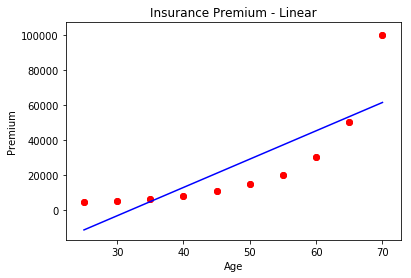

In [12]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, linregressor.predict(X), color = 'blue')
plt.title('Insurance Premium - Linear')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.show()

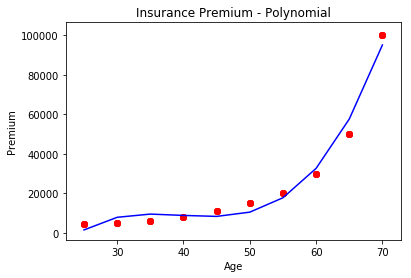

In [16]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, linregressor2.predict(polyfeature.fit_transform(X)), color ='blue')
plt.title('Insurance Premium - Polynomial')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.show()

In [17]:
#==============================================================================
# Now see how accurately polynomial and linear regressor predict premium based
# on age
#==============================================================================

In [19]:
val = 55
predictionLinear = linregressor.predict(val)
predictionPloy = linregressor2.predict(polyfeature.fit_transform(val))

print("linear prediction: ", predictionLinear)
print('polynomial prediction: ', predictionPloy)

linear prediction:  [ 37081.81818182]
polynomial prediction:  [ 17759.44055947]


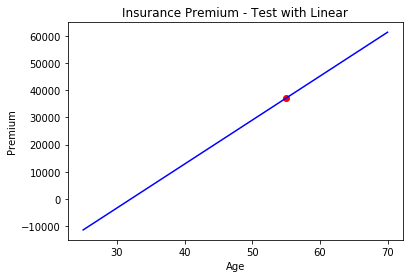

In [20]:
# now let's see whether the respective regressors give the correct output for val = 55
# note the correct output in prior polynomial trend and compare with what the following graphs predict
# for val = 55, we expect output value closer to 20000 as per initial data trend
# Visualising the Linear Regression results
plt.scatter(val, predictionLinear, color = 'red')
plt.plot(X, linregressor.predict(X), color = 'blue')
plt.title('Insurance Premium - Test with Linear')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.show()

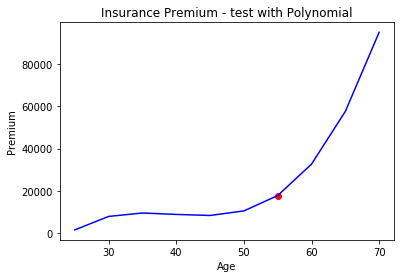

In [21]:
# Visualising the Polynomial Regression results
plt.scatter(val, predictionPloy, color = 'red')
plt.plot(X, linregressor2.predict(polyfeature.fit_transform(X)), color = 'blue')
plt.title('Insurance Premium - test with Polynomial')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.show()